한국어 Word2Vec 만들기(네이버 뉴스)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
import re
from konlpy.tag import Okt
from gensim.models import FastText

In [2]:
# 상폐기업 = pd.read_csv('./data/상폐기업뉴스.csv')
정상기업 = pd.read_csv("정상_새로합친거.csv",index_col=0)


In [3]:
data=정상기업
# data=pd.concat([상폐기업, 정상기업], axis = 0)
# data=pd.concat([상폐기업, 정상기업], axis = 0)

In [4]:
data

,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문
0,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...,NaN
1,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...,NaN
2,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...,NaN
3,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN
4,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN
...,...,...,...,...,...
2490,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...,에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진=에이치엘비\n에이치...
2491,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...,[서울=뉴시스] 에이치엘비 CI\n\n\n[서울=뉴시스] 김제이 기자 = 에이치엘비...
2492,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...,[한국경제TV 김정필 IT벤처팀장]\n\n\n-168·252kW급 수소연료전지선박 ...
2493,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...,"코스닥지수, 지난해 말 대비 44.6% 상승\n개인 비중 88.2%로 확대…거래량 ..."


In [33]:
data["기사발행일"]

0        2011.08.16. 오전 9:21
1        2011.06.08. 오전 7:58
2        2011.06.07. 오후 5:31
3       2011.03.12. 오전 10:01
4        2011.03.11. 오후 4:21
                ...         
6741     2020.09.22. 오전 5:20
6742     2020.09.21. 오후 4:18
6743     2020.12.04. 오후 4:15
6744     2020.12.30. 오후 5:45
6745     2020.12.22. 오전 9:17
Name: 기사발행일, Length: 6746, dtype: object

In [34]:
time=data["기사발행일"].str.split('.').tolist()
time_df=pd.DataFrame(time,columns=['년','월','일','시간'])
time_df.drop("시간",axis=1,inplace=True)

In [36]:
time_df

,년,월,일
0,2011,08,16
1,2011,06,08
2,2011,06,07
3,2011,03,12
4,2011,03,11
...,...,...,...
6741,2020,09,22
6742,2020,09,21
6743,2020,12,04
6744,2020,12,30


In [37]:
time_data=pd.concat([time_df,data],axis=1)
# time_data["기사제목"].groupby(time_data["년"]).count()


In [38]:
time_data

,년,월,일,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문,뉴스기사 레이블
0,2011,08,16,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...,NaN,0
1,2011,06,08,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...,NaN,1
2,2011,06,07,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...,NaN,0
3,2011,03,12,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
4,2011,03,11,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
...,...,...,...,...,...,...,...,...,...
6741,2020,09,22,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...,에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진=에이치엘비\n에이치...,0
6742,2020,09,21,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...,[서울=뉴시스] 에이치엘비 CI\n\n\n[서울=뉴시스] 김제이 기자 = 에이치엘비...,0
6743,2020,12,04,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...,[한국경제TV 김정필 IT벤처팀장]\n\n\n-168·252kW급 수소연료전지선박 ...,0
6744,2020,12,30,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...,"코스닥지수, 지난해 말 대비 44.6% 상승\n개인 비중 88.2%로 확대…거래량 ...",0


In [8]:
# time_data.groupby(["기업","년"]).sum()
# time_data_1=time_data.groupby(["기업","년"]).sum()
# time_data_1

In [9]:
# NULL 값 존재 유무
# print(train_data.isnull().values.any())

In [10]:
# train_data = train_data.dropna(how = 'any')  # Null 값이 존재하는 행 제거
# print(train_data.isnull().values.any())      # Null 값이 존재하는지 확인

In [11]:
print(len(data))   # 기사본문 개수 출력

6746


In [12]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [13]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

okt = Okt()
tokenized_data = []
output=[]
for sentence in data['뉴스기사본문전처리']:
    temp_X = okt.nouns(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거

    tokenized_data.append(temp_X)


한글자제거

In [14]:
remove_one_word=[]
for j in range(len(tokenized_data)):
    a=[x for x in tokenized_data[j] if len(x)>1]
    remove_one_word.append(a)
    

In [15]:
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [16]:
from collections import Counter

In [17]:
횟수=Counter(list_text_1)
횟수['폐지']
# for i in range(len(list_text_1)):
    
# print(Counter(list_text_1))

44

기사의 길이 및 분포 확인

기사의 최대 길이 : 2003
기사의 평균 길이 : 188.42158316039135


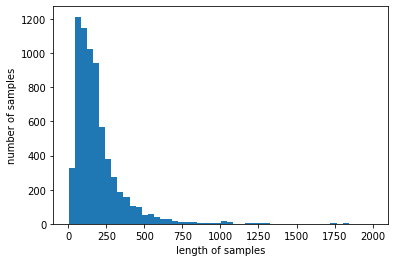

In [18]:
# 기사 길이 분포 확인

print('기사의 최대 길이 :',max(len(l) for l in tokenized_data))
print('기사의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show();

In [24]:
data.reset_index(inplace=True)
data

,index,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문,뉴스기사 레이블
0,0,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...,NaN,0
1,1,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...,NaN,0
2,2,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...,NaN,0
3,3,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
4,4,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
...,...,...,...,...,...,...,...
6741,2490,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...,에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진=에이치엘비\n에이치...,0
6742,2491,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...,[서울=뉴시스] 에이치엘비 CI\n\n\n[서울=뉴시스] 김제이 기자 = 에이치엘비...,0
6743,2492,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...,[한국경제TV 김정필 IT벤처팀장]\n\n\n-168·252kW급 수소연료전지선박 ...,0
6744,2493,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...,"코스닥지수, 지난해 말 대비 44.6% 상승\n개인 비중 88.2%로 확대…거래량 ...",0


In [28]:
data.drop(["index"],inplace=True,axis=1)

In [22]:
data["뉴스기사 레이블"]=data["기사제목"]

뉴스기사 레이블 시키기

In [29]:
keywords=["상폐", "적격성", "이의신청", "폐지"]
for i in range(len(data)):
    if any(keyword in str(data["뉴스기사본문전처리"][i]) for keyword in keywords)==True:
        data['뉴스기사 레이블'][i]=1
    else:
        data['뉴스기사 레이블'][i]=0

In [30]:
data['뉴스기사 레이블'].sum()

162

In [31]:
data

,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문,뉴스기사 레이블
0,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...,NaN,0
1,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...,NaN,1
2,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...,NaN,0
3,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
4,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
...,...,...,...,...,...,...
6741,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...,에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진=에이치엘비\n에이치...,0
6742,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...,[서울=뉴시스] 에이치엘비 CI\n\n\n[서울=뉴시스] 김제이 기자 = 에이치엘비...,0
6743,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...,[한국경제TV 김정필 IT벤처팀장]\n\n\n-168·252kW급 수소연료전지선박 ...,0
6744,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...,"코스닥지수, 지난해 말 대비 44.6% 상승\n개인 비중 88.2%로 확대…거래량 ...",0


In [39]:
data_df=time_data

data_df

,년,월,일,기업,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문,뉴스기사 레이블
0,2011,08,16,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",일 코스닥 시장에서는 부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 인수 소...,NaN,0
1,2011,06,08,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,코스피 시장는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드...,NaN,1
2,2011,06,07,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",는 법인청산에 따라 푸드서비스를 계열사에서 제외한다고 일 공시했다. 푸드서비스의 자...,NaN,0
3,2011,03,12,씨제이이엔엠,2011.03.12. 오전 10:01,"현대카드ㆍ현대캐피탈, 사업성공 프로그램 후원",현대카드현대캐피탈은 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
4,2011,03,11,씨제이이엔엠,2011.03.11. 오후 4:21,"""27일까지 사업성공 스토리에 도전하세요""",현대카드현대캐피탈이 성공을 향해 열정적으로 도전하는 개인사업자들의 이야기를 담은 리...,NaN,0
...,...,...,...,...,...,...,...,...,...
6741,2020,09,22,에이치엘비,2020.09.22. 오전 5:20,"에이치엘비 리보세라닙, 글로벌 항암제로 성공 가능성↑",에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진에이치엘비에이치엘비의...,에이치엘비가 유럽종양학회에서 리보세라닙의 가치를 입증했다./사진=에이치엘비\n에이치...,0
6742,2020,09,21,에이치엘비,2020.09.21. 오후 4:18,"에이치엘비, ESMO서 '리보세라닙' 관련 논문 23개 발표",에이치엘비 김제이 기자 에이치엘비는 유럽종양학회에서 리보세라닙 관련 논문이 개...,[서울=뉴시스] 에이치엘비 CI\n\n\n[서울=뉴시스] 김제이 기자 = 에이치엘비...,0
6743,2020,12,04,에이치엘비,2020.12.04. 오후 4:15,"에스퓨얼셀, 에이치엘비와 수소선박 공동개발 '맞손'…""2023년 상용화 목표""",급 수소연료전지선박 개발 협력년 수소유람선 상용화 목표설계 모듈화연료전지 전문업체 ...,[한국경제TV 김정필 IT벤처팀장]\n\n\n-168·252kW급 수소연료전지선박 ...,0
6744,2020,12,30,에이치엘비,2020.12.30. 오후 5:45,"코스닥, 23년만에 최고치…시총도 지각변동",코스닥지수 지난해 말 대비 . 상승개인 비중 .로 확대거래량 급등한국거래소는 일 년...,"코스닥지수, 지난해 말 대비 44.6% 상승\n개인 비중 88.2%로 확대…거래량 ...",0


In [46]:
sum_df=data_df.groupby(["기업","년"]).sum()
# count_df.columns=['기사발행일', '기사제목', '뉴스기사본문', '뉴스기사본문전처리', '뉴스기사 수']
sum_df["뉴스기사 레이블"]

기업       년   
경창산업     2013    0
고영테크놀러지  2011    1
광림       2016    0
금화피에스시   2013    9
나스미디어    2017    0
                ..
하이록코리아   2012    0
한국정보통신   2015    0
해성산업     2013    2
홈캐스트     2016    0
휴맥스      2011    1
Name: 뉴스기사 레이블, Length: 124, dtype: int64

In [47]:
time_df_1=data_df.groupby(["기업","년"]).count()
time_df_1

,,월,일,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문,뉴스기사 레이블
기업,년,,,,,,,
경창산업,2013,60,60,60,60,60,15,60
고영테크놀러지,2011,46,46,46,46,46,25,46
광림,2016,55,55,55,55,55,11,55
금화피에스시,2013,70,70,70,70,70,6,70
나스미디어,2017,69,69,69,69,69,25,69
...,...,...,...,...,...,...,...,...
하이록코리아,2012,69,69,69,69,69,31,69
한국정보통신,2015,22,22,22,22,22,7,22
해성산업,2013,20,20,20,20,20,7,20


In [44]:
#time_data_1.drop(["월","일"],axis=1,inplace=True)
# count_df=time_data_1.groupby(["기업","년"])
# count_df
time_data_1.groupby(["기업","년"]).sum()

# count_df.columns=['기사발행일', '기사제목', '뉴스기사본문', '뉴스기사본문전처리', '뉴스기사 수']


,,월,일,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문,뉴스기사 레이블
기업,년,,,,,,,
경창산업,2013,60,60,60,60,60,15,60
고영테크놀러지,2011,46,46,46,46,46,25,46
광림,2016,55,55,55,55,55,11,55
금화피에스시,2013,70,70,70,70,70,6,70
나스미디어,2017,69,69,69,69,69,25,69
...,...,...,...,...,...,...,...,...
하이록코리아,2012,69,69,69,69,69,31,69
한국정보통신,2015,22,22,22,22,22,7,22
해성산업,2013,20,20,20,20,20,7,20


In [50]:
time_df_1["부도기사 비율"]=time_df_1["기사제목"]

In [51]:
time_df_1["부도기사 비율"]=round(sum_df["뉴스기사 레이블"]/time_df_1["뉴스기사 레이블"]*100,2)
# final_df=pd.DataFrame(data["부도기사 비율"])
# final_df.to_csv("okt_fasttext_정상기업_부도기사 비율.csv",encoding="utf-8-sig")
# final_df

In [52]:
time_df_1

,,월,일,기사발행일,기사제목,뉴스기사본문전처리,뉴스기사본문,뉴스기사 레이블,부도기사 비율
기업,년,,,,,,,,
경창산업,2013,60,60,60,60,60,15,60,0.00
고영테크놀러지,2011,46,46,46,46,46,25,46,2.17
광림,2016,55,55,55,55,55,11,55,0.00
금화피에스시,2013,70,70,70,70,70,6,70,12.86
나스미디어,2017,69,69,69,69,69,25,69,0.00
...,...,...,...,...,...,...,...,...,...
하이록코리아,2012,69,69,69,69,69,31,69,0.00
한국정보통신,2015,22,22,22,22,22,7,22,0.00
해성산업,2013,20,20,20,20,20,7,20,10.00


In [54]:
# time_data_1["부도기사 비율"]=round(sum_df["뉴스기사 레이블"]/time_data_1["뉴스기사 레이블"]*100,2)
final_df=pd.DataFrame(time_df_1["부도기사 비율"])
final_df.to_csv("okt_fasttext_정상기업_부도기사 비율.csv",encoding="utf-8-sig")
final_df

,,부도기사 비율
기업,년,
경창산업,2013,0.00
고영테크놀러지,2011,2.17
광림,2016,0.00
금화피에스시,2013,12.86
나스미디어,2017,0.00
...,...,...
하이록코리아,2012,0.00
한국정보통신,2015,0.00
해성산업,2013,10.00


In [ ]:
plor=["폐지","퇴출","기로","벼랑"]
a="|".join(plor)
df=train_data[train_data['뉴스기사본문전처리'].str.contains(a)]

len(df)


241

s

In [ ]:
import pandas as pd